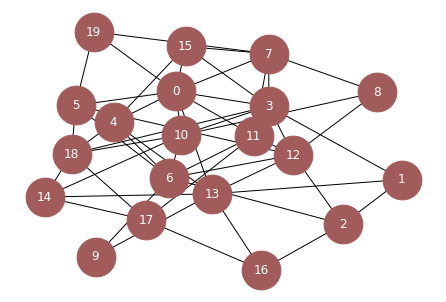

In [2]:
# 1. The Simulation class
# 1.1 Creating a simulation
# 1.1.1 The graph

import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G, with_labels=True, node_color = '#A25B5B', node_size = 1500, font_color ='white' )

In [3]:
# 1.1.2 The initial state

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state
initial_state(G)


{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [10]:
# 1.1.3 The state transition function
import random

p_awaken = 0.15
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < p_awaken:
                next_state[node] = 'awake'
    return next_state
test_state = initial_state(G)
state_transition(G, test_state)

{3: 'awake', 5: 'awake', 7: 'awake', 16: 'awake'}

In [13]:
# 1.1.4 Putting together the pieces

from simulation import Simulation
sim = Simulation(G, initial_state, state_transition, name='Simple Sim')
sim.state()


{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

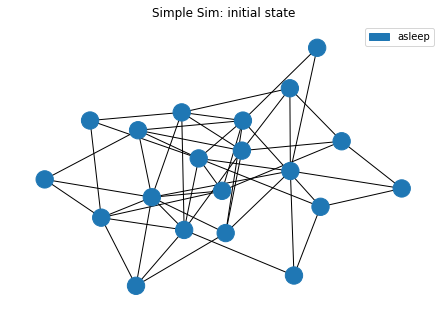

In [17]:
sim.draw()


In [18]:
# 1.2 Running the simulation

sim.run()


In [19]:
sim.steps


1

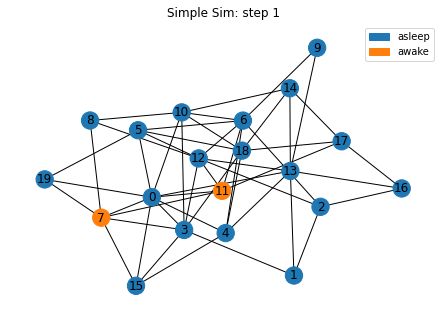

In [21]:
sim.draw(with_labels=True)


In [22]:
sim.run(10)
sim.steps


11

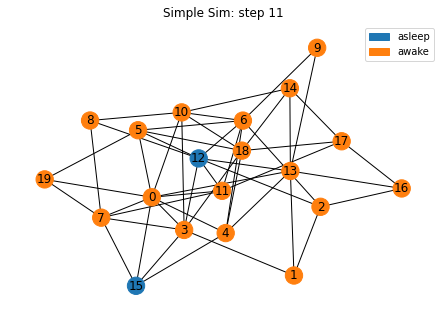

In [23]:
sim.draw(with_labels=True)


<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

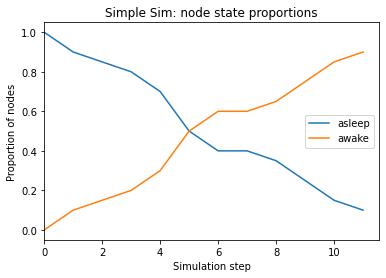

In [24]:
# 1.3 Visualizing the results
sim.plot()


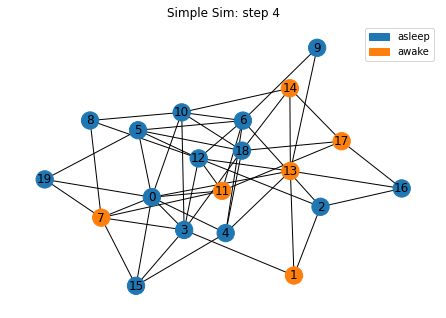

In [25]:
sim.draw(4, with_labels=True)


In [26]:
sim.state(4)


{0: 'asleep',
 1: 'awake',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'awake',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'awake',
 12: 'asleep',
 13: 'awake',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'awake',
 18: 'asleep',
 19: 'asleep'}

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

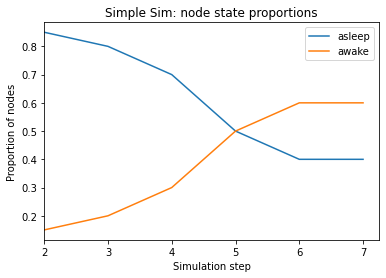

In [27]:
sim.plot(min_step=2, max_step=8)


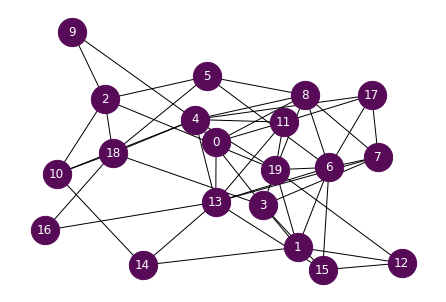

In [31]:
# 2. The voter model
# 2.1 Create the simulation
# 2.1.1 The Graph
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G, with_labels=True, node_color = '#570A57', node_size = 800, font_color ='white' )

In [32]:
# 2.1.2 Initial state
import random
import string
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCDEF')
    return state
initial_state(G)


{0: 'E',
 1: 'C',
 2: 'C',
 3: 'A',
 4: 'C',
 5: 'C',
 6: 'F',
 7: 'D',
 8: 'F',
 9: 'C',
 10: 'C',
 11: 'A',
 12: 'B',
 13: 'E',
 14: 'A',
 15: 'E',
 16: 'E',
 17: 'D',
 18: 'B',
 19: 'B'}

In [33]:
# 2.1.3 State transition
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state
test_state = initial_state(G)
state_transition(G, test_state)


{0: 'B',
 1: 'F',
 2: 'D',
 3: 'D',
 4: 'C',
 5: 'D',
 6: 'C',
 7: 'F',
 8: 'B',
 9: 'D',
 10: 'A',
 11: 'C',
 12: 'D',
 13: 'F',
 14: 'A',
 15: 'E',
 16: 'D',
 17: 'E',
 18: 'A',
 19: 'F'}

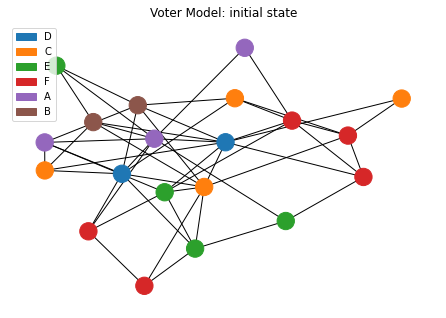

In [35]:
# 2.1.4 The Simulation instance
import matplotlib.pyplot as plt
sim = Simulation(G, initial_state, state_transition, name='Voter Model')
sim.draw()


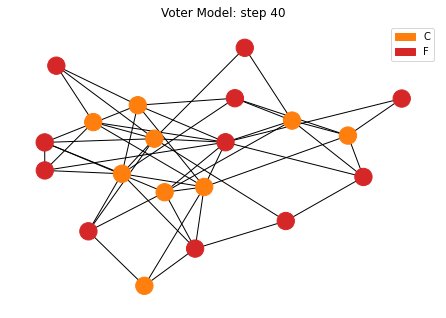

In [36]:
# 2.2 Run the simulation
sim.run(40)
sim.draw()


<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

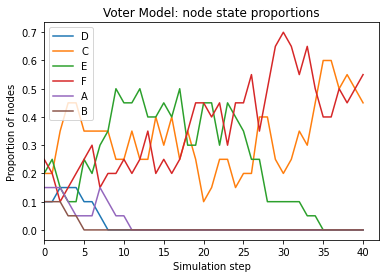

In [37]:
# 2.3 Visualize the results
sim.plot()



In [38]:
# 2.4 Synchronous vs. asynchronous updates
import random
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [39]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [40]:
def state_transition_async(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

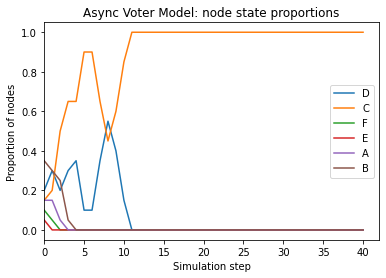

In [41]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()

In [43]:
# 2.5 Stop condition
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

Stop condition met at step 17.


In [44]:
sim.steps


17

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

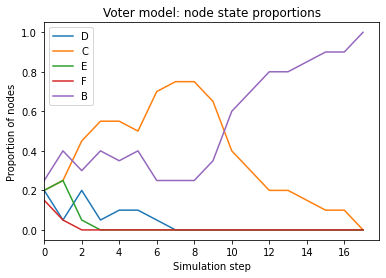

In [45]:
sim.plot()


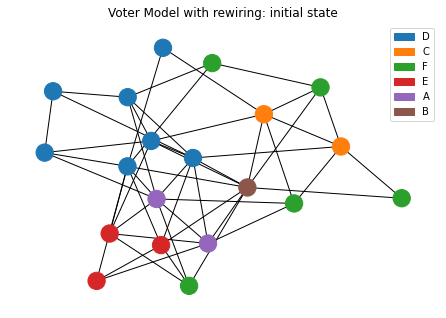

In [46]:
# 2.6 Rewiring the graph
def state_transition_async_rewiring(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,
                 name='Voter Model with rewiring')
sim.draw()

Stop condition met at step 3.


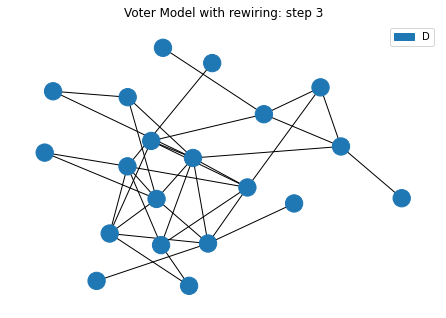

In [47]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

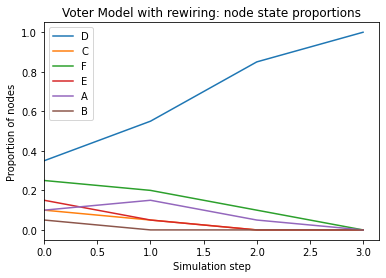

In [48]:
sim.plot()


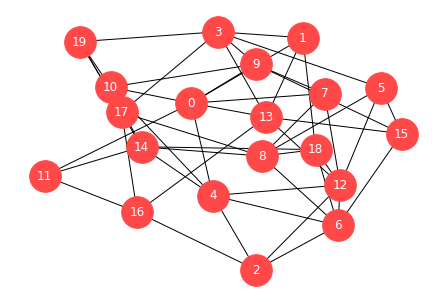

In [50]:
# 3. The SIS model
# 3.1 Create the Simulation
# 3.1.1 The Graph
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G, with_labels=True, node_color = '#FF4949', node_size = 1000, font_color ='white' )

In [51]:
# 3.1.2 Initial state
import random
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state
initial_state(G)


{0: 'I',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [53]:
# 3.1.3 State transition
MU = 0.1
BETA = 0.1

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state
test_state = initial_state(G)
state_transition(G, test_state)

{}

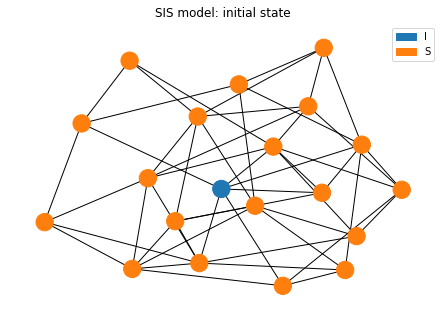

In [54]:
# 3.1.4 Simulation
sim = Simulation(G, initial_state, state_transition, name='SIS model')
sim.draw()


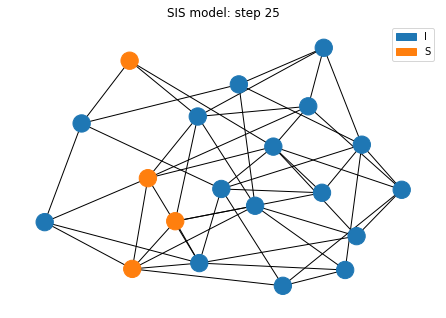

In [55]:
# 3.2 Run the simulation
sim.run(25)
sim.draw()


<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

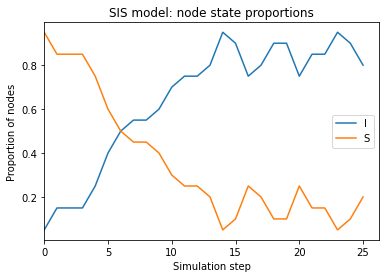

In [56]:
sim.plot()
